<a href="https://colab.research.google.com/github/Vynn0/DAA/blob/main/DAA_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PageRank 100 iterasi dengan adjacency matrix

## Studi Kasus 1:

In [29]:
# Adjacency Matrix
import numpy as np

# Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

# Set the damping factor
damping_factor = 0.85

# Initialize the PageRank values
num_pages = len(adjacency_matrix)
page_rank = np.ones(num_pages) / num_pages

# Number of iterations
num_iterations = 100

for i in range(num_iterations):
  new_page_rank = np.zeros(num_pages)
  for j in range(num_pages):
    # Calculate the PageRank contribution from each linking page
    linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
    for linking_page in linking_pages:
      new_page_rank[j] += page_rank[linking_page] / sum(adjacency_matrix[linking_page, :])
    new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
  page_rank = new_page_rank

# Print the final PageRank values
for page, rank in enumerate(page_rank):
  print(f"PR(Page {page+1} = {rank:.3f})")

PR(Page 1 = 0.122)
PR(Page 2 = 0.302)
PR(Page 3 = 0.378)
PR(Page 4 = 0.198)


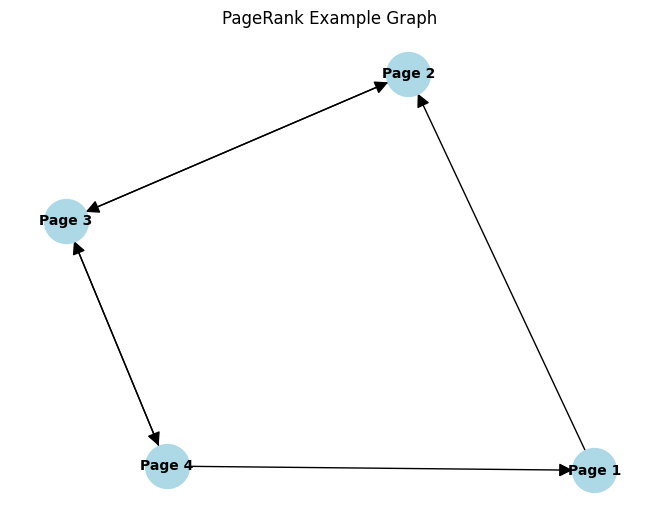

In [43]:
## Membuat Graph dari Adjacency Matrix
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

# Add edges based on the adjacency matrix
for i in range(num_pages):
  for j in range(num_pages):
    if adjacency_matrix[i, j] == 1:
      G.add_edge(i, j)

# Draw the graph
pos = nx.spring_layout(G) # Layout the graph
labels = {i: f"Page {i+1}" for i in range(num_pages)}
nx.draw(G, pos, with_labels=True, labels=labels, node_size = 1000, node_color='lightblue', font_size = 10, font_color = 'black', font_weight = 'bold', arrowsize = 20)
plt.title("PageRank Example Graph")
plt.show()

## Function / Procedure untuk Count dan Display Adjacency Matrix

## Studi Kasus 1:

In [30]:
import numpy as np

def countMt(adjacency_matrix):
  # Set the damping factor
  damping_factor = 0.85

  # Initialize the PageRank values
  num_pages = len(adjacency_matrix)
  page_rank = np.ones(num_pages) / num_pages

  # Number of iterations
  num_iterations = 100

  for i in range(num_iterations):
    new_page_rank = np.zeros(num_pages)
    for j in range(num_pages):
      # Calculate the PageRank contribution from each linking page
      linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
      for linking_page in linking_pages:
        new_page_rank[j] += page_rank[linking_page] / sum(adjacency_matrix[linking_page, :])
      new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
    page_rank = new_page_rank

  # Print the final PageRank values
  for page, rank in enumerate(page_rank):
    print(f"PR(Page {page+1} = {rank:.3f})")

In [45]:
#import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def displayMt(adjacency_matrix):

  # Create a directed graph
  G = nx.DiGraph()

  # Add nodes
  num_pages = len(adjacency_matrix)
  G.add_nodes_from(range(num_pages))

  # Add edges based on the adjacency matrix
  for i in range(num_pages):
    for j in range(num_pages):
      if adjacency_matrix[i, j] == 1:
        G.add_edge(i, j)

  # Draw the graph
  pos = nx.spring_layout(G) # Layout the graph
  labels = {i: f"Page {i+1}" for i in range(num_pages)}
  nx.draw(G, pos, with_labels=True, labels=labels, node_size = 1000, node_color='lightblue', font_size = 10, font_color = 'black', font_weight = 'bold', arrowsize = 20)
  plt.title("PageRank Example Graph")
  plt.show()

PR(Page 1 = 0.122)
PR(Page 2 = 0.302)
PR(Page 3 = 0.378)
PR(Page 4 = 0.198)


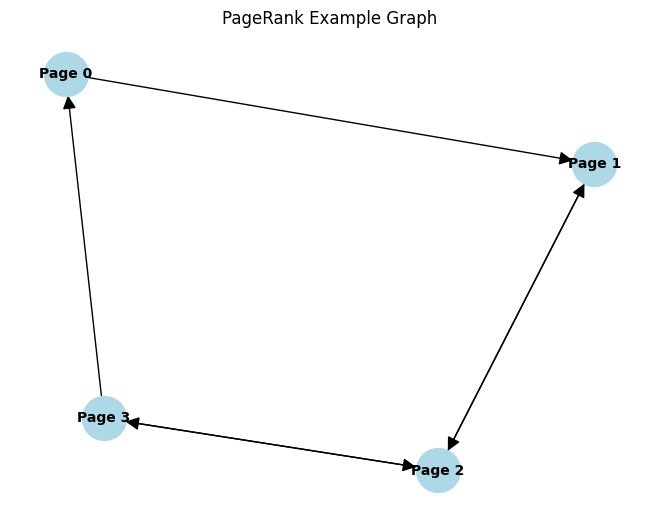

In [28]:
# Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])
countMt(adjacency_matrix)
displayMt(adjacency_matrix)



---

## Studi Kasus 2:

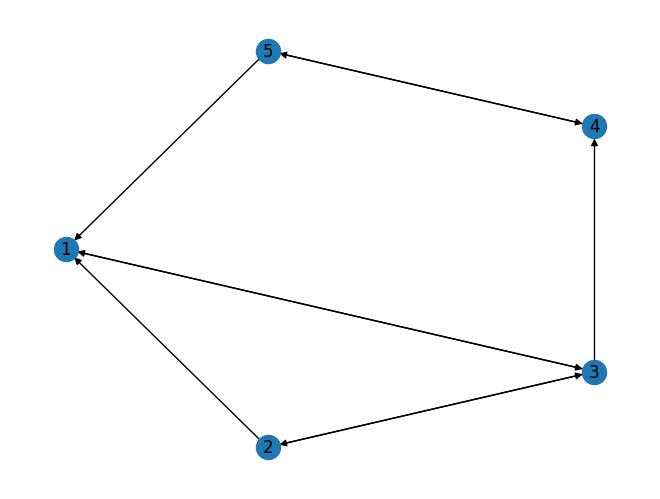

In [14]:
# Import library
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Kumpulan halaman dalam jaringan bernama myWeb
myWeb = nx.DiGraph()
myPages = range(1,5)

# Menghubungkan secara uncuk untuk simulasi jaringan
connections = [(1,3), (2,1), (2,3), (3,1), (3,2), (3,4), (4,5), (5,1), (5,4)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

# Melakukan plotting
pos = nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.show()

In [15]:
import networkx as nx
import numpy as np

def CreatePageRank(aGraph):
  nodes_set = len(aGraph)
  M = nx.to_numpy_array(aGraph) # Menggunakan metode to_numpy_array
  outwards = np.squeeze(np.asarray(np.sum(M, axis = 1)))
  prob_outwards = np.array(1.0 / outwards)
  G = np.multiply(M, prob_outwards[:, np.newaxis])
  p = np.ones(nodes_set) / float(nodes_set)

  return G,p

# Contoh penggunaan:
myWeb = nx.DiGraph()
connections = [(1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 4), (4, 5), (5, 1), (5, 4)]
myWeb.add_edges_from(connections)

G, p = CreatePageRank(myWeb)
print(G)

[[0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5        0.        ]]


In [21]:
# Inisialisasi nilai awal PageRank
pagerank = np.array([1, 1, 1, 1, 1], dtype = float)

# Faktor damping
damping_factor = 0.85

# Jumlah iterasi
num_iterations = 100

for _ in range(num_iterations):
  # Inisialisasi PageRank baru
  new_pagerank = np.zeros(pagerank.shape, dtype=float)

  for i in range(adjacency_matrix.shape[0]):
    for j in range(adjacency_matrix.shape[1]):
      # Hitung jumlah tautan keluar dari halaman i
      num_outlinks = np.sum(adjacency_matrix[i, :])

      # Perbarui PageRank berdasarkan rumus PageRank
      if num_outlinks > 0:
        new_pagerank[j] += (damping_factor * pagerank[i] / num_outlinks)

  # Normalisasi PageRank
  new_pagerank += (1 - damping_factor) / len(pagerank)

  # Perbarui nilai PageRank
  pagerank = new_pagerank

# Hasil PageRank
print("Hasil PageRank:")
print(pagerank)

Hasil PageRank:
[4.59561282e+40 4.59561282e+40 4.59561282e+40 4.59561282e+40
 3.00000000e-02]


###Latihan 1 - 7:

In [34]:
# Import library
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# FUNCTION DISPLAY GRAPH CONNECTION
def displayGraph(connections):
  # Kumpulan halaman dalam jaringan bernama myWeb
  myWeb = nx.DiGraph()
  myPages = range(1,5)

  myWeb.add_nodes_from(myPages)
  myWeb.add_edges_from(connections)

  # Melakukan plotting
  pos = nx.shell_layout(myWeb)
  nx.draw(myWeb, pos, arrows=True, with_labels=True)
  plt.show()

In [ ]:
# LATIHAN 1

connections = [(1,2), (2,3), (3,4), (4,5), (5,6)]

displayGraph(connections)

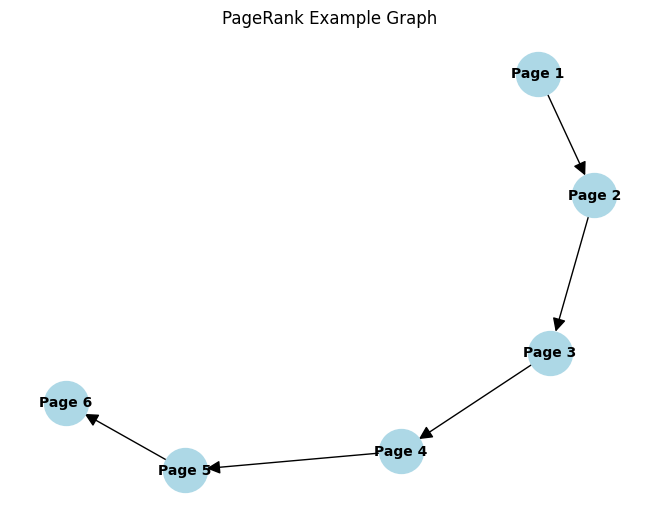

In [49]:
# LATIHAN 1 - GRAPH MATRIX MODE

adjacency_matrix = np.array([[0, 1, 0, 0, 0, 0],
                             [0, 0, 1, 0, 0, 0],
                             [0, 0, 0, 1, 0, 0],
                             [0, 0, 0, 0, 1, 0],
                             [0, 0, 0, 0, 0, 1],
                             [0, 0, 0, 0, 0, 0]])
displayMt(adjacency_matrix)

In [ ]:
# LATIHAN 2

connections = [(1,2), (2,3), (3,4), (4,5), (5,1)]

displayGraph(connections)

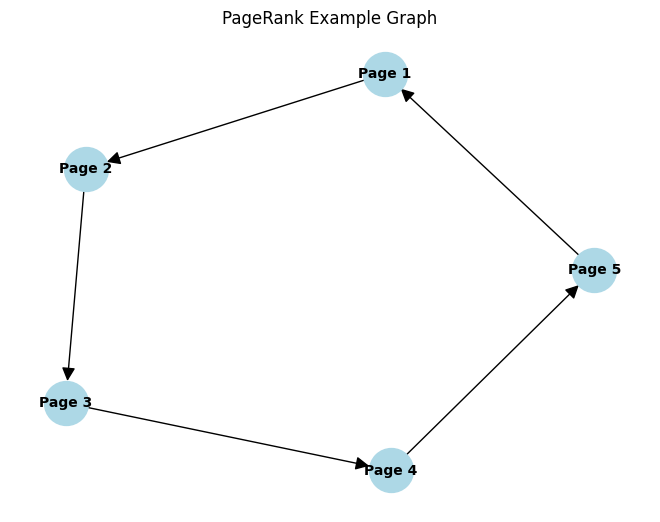

In [62]:
# LATIHAN 2 - GRAPH MATRIX MODE

adjacency_matrix = np.array([[0, 1, 0, 0, 0],
                             [0, 0, 1, 0, 0],
                             [0, 0, 0, 1, 0],
                             [0, 0, 0, 0, 1],
                             [1, 0, 0, 0, 0]])
displayMt(adjacency_matrix)

In [ ]:
# LATIHAN 3

connections = [(1,2), (2,1), (2,3), (3,2), (3,4), (4,3)]

displayGraph(connections)

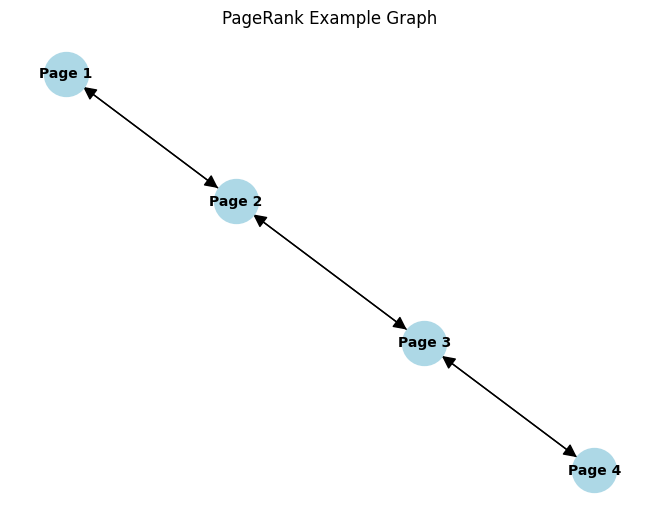

In [57]:
# LATIHAN 3 - GRAPH MATRIX MODE

adjacency_matrix = np.array([[0, 1, 0, 0],
                             [1, 0, 1, 0],
                             [0, 1, 0, 1],
                             [0, 0, 1, 0],])
displayMt(adjacency_matrix)

In [ ]:
# LATIHAN 4

connections = [(1,2), (2,3), (3,4), (4,5), (5,6), (6,1)]

displayGraph(connections)

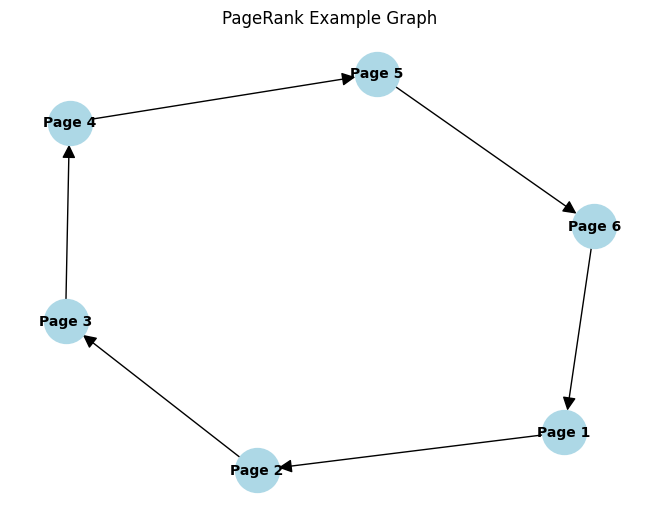

In [60]:
# LATIHAN 4 - GRAPH MATRIX MODE

adjacency_matrix = np.array([[0, 1, 0, 0, 0, 0],
                             [0, 0, 1, 0, 0, 0],
                             [0, 0, 0, 1, 0, 0],
                             [0, 0, 0, 0, 1, 0],
                             [0, 0, 0, 0, 0, 1],
                             [1, 0, 0, 0, 0, 0]])
displayMt(adjacency_matrix)

In [ ]:
# LATIHAN 5

connections = [(1,2), (2,1), (2,3), (3,2), (3,4), (4,1), (4,3)]

displayGraph(connections)

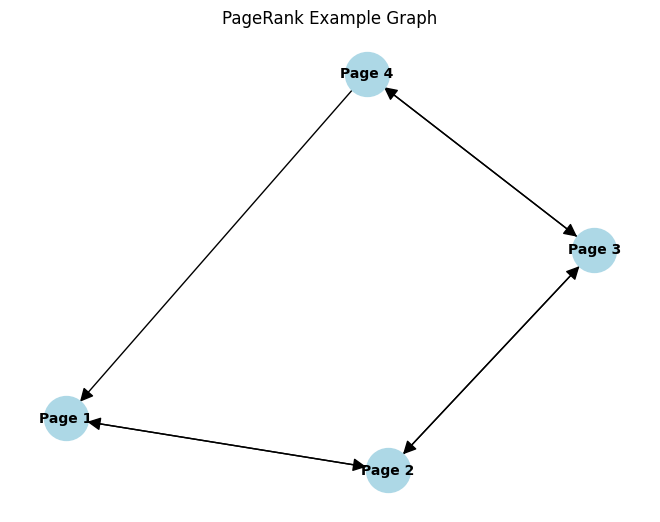

In [65]:
# LATIHAN 5 - GRAPH MATRIX MODE

adjacency_matrix = np.array([[0, 1, 0, 0],
                             [1, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])
displayMt(adjacency_matrix)

In [ ]:
# LATIHAN 6

connections = [(1,2), (2,3), (3,4), (4,1), (4,5), (5,1)]

displayGraph(connections)

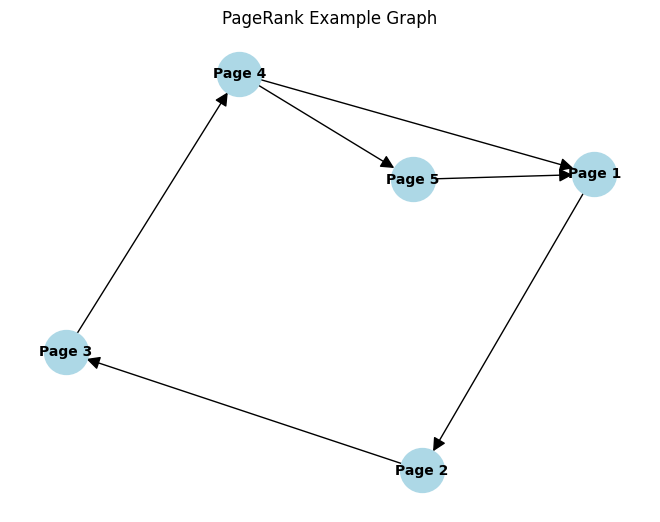

In [56]:
# LATIHAN 6 - GRAPH MATRIX MODE

adjacency_matrix = np.array([[0, 1, 0, 0, 0],
                             [0, 0, 1, 0, 0],
                             [0, 0, 0, 1, 0],
                             [1, 0, 0, 0, 1],
                             [1, 0, 0, 0, 0]])
displayMt(adjacency_matrix)

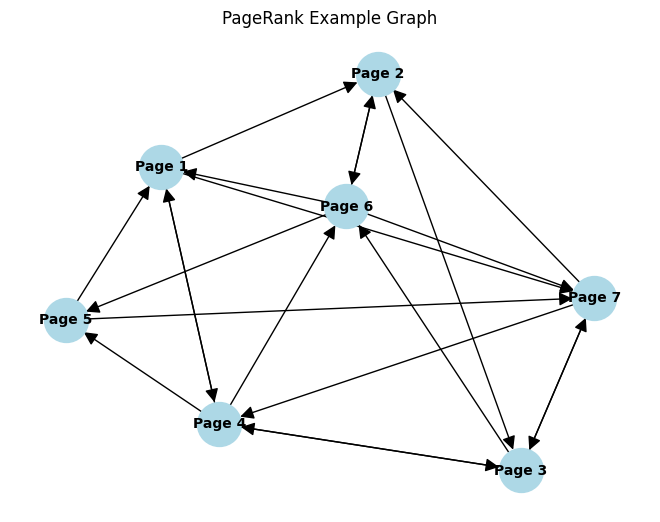

In [67]:
# LATIHAN 7 - GRAPH MATRIX MODE

adjacency_matrix = np.array([[0, 1, 0, 1, 0, 0, 1],
                             [0, 0, 1, 0, 0, 1, 0],
                             [0, 0, 0, 1, 0, 1, 1],
                             [1, 0, 1, 0, 1, 1, 0],
                             [1, 0, 0, 0, 0, 0, 1],
                             [1, 1, 0, 0, 1, 0, 1],
                             [0, 1, 1, 1, 0, 0, 0]])
displayMt(adjacency_matrix)

**Soal:**

Buatlah analisa penerapan algoritma page rank dalam menjawab permasalahan sosial atau kehidupan manusia.

**Jawaban:**

Aplikasi social media sering menggunakan algoritma pagerank atau algoritma yang berbasis dari pagerank untuk melakukan rekomendasi, seperti rekomendasi followers, rekomendasi konten yang tergantung dari sejarah user, dan lain lain.

Search engine Google menggunakan algoritma pagerank sebagai basis dasar metode searching yang paling relevan dengan keyword si user.